In [279]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import IPython
import matplotlib
import matplotlib.pyplot as pyplot
import keras
from keras.models import load_model
import keras.saving
import keras.utils
import tensorflow as tf
import numpy as np

import determineTable

dataDir = "E:/Work/NonoGram/"

digitRecognizerModelFileName = f"{dataDir}/digitRecognizerMnist.keras"
digitRecognizer = load_model(digitRecognizerModelFileName)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read image

In [280]:
#image = cv2.imread('E:/Work/NonoGram/Data/sample.png') 
#image = cv2.imread('E:/Work/NonoGram/Data/puzzle.jpg') 
image = cv2.imread('E:/Work/NonoGram/Data/wikipedia.png') 
#image = cv2.imread('E:/Work/NonoGram/Data/sample3.png') 
#image = cv2.imread('E:/Work/NonoGram/Data/sample4.png')  # issues with ones recongized as 7s & other misfires
#image = cv2.imread('E:/Work/NonoGram/Data/sample5.png') # issues with ones recongized as 7s


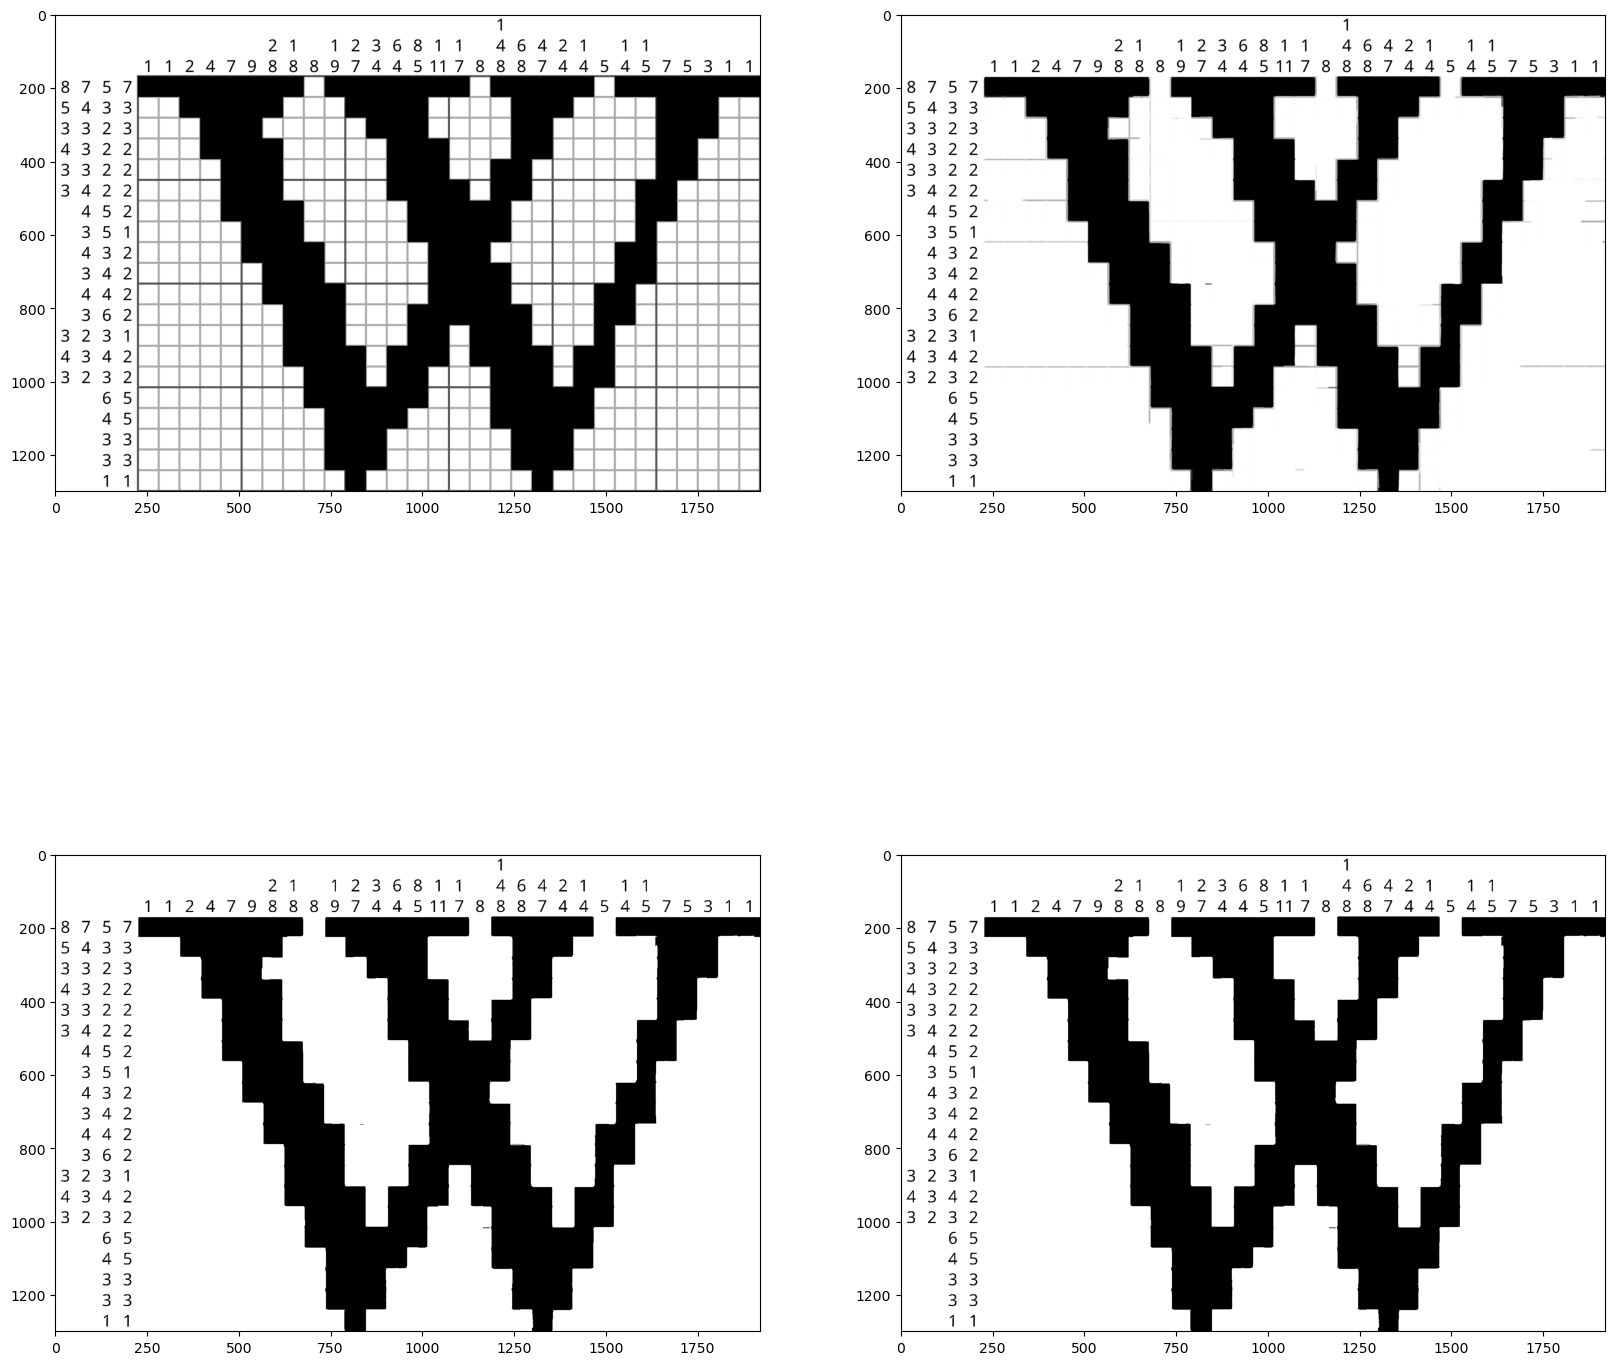

In [281]:
import removeLines
image_without_lines = removeLines.remove_lines(image)
image_contours = image_without_lines.copy()
image_contours = cv2.cvtColor(image_contours, cv2.COLOR_BGR2GRAY)
(_, image_contours) = cv2.threshold(image_contours, 100, 255, cv2.THRESH_BINARY)        # todo use 10 as bound

image_digits = image_without_lines.copy()
#image_digits = cv2.GaussianBlur(image_digits, (1, 1), 0)
image_digits = cv2.cvtColor(image_digits, cv2.COLOR_BGR2GRAY)
(_, image_digits) = cv2.threshold(image_digits, 100, 255, cv2.THRESH_BINARY)
#imageCopy = cv2.dilate(imageCopy, (3,3), 1)
#imageCopy = cv2.GaussianBlur(imageCopy, (1, 1), 0)
#imageCopy = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#imageCopy = cv2.Canny(imageCopy, 50, 150)
#imageCopy = 255-imageCopy
#imageCopy = cv2.Canny(imageCopy, 50, 150)

figure = pyplot.figure(figsize=(20,20))
gs = figure.add_gridspec(2,2)
figure.add_subplot(gs[0]).imshow(image, cmap="gray")
figure.add_subplot(gs[1]).imshow(image_without_lines, cmap="gray")
figure.add_subplot(gs[2]).imshow(image_contours, cmap="gray")
figure.add_subplot(gs[3]).imshow(image_digits, cmap="gray")


# Find left and right based on lines

117.5
[[[ 197 1255]]

 [[ 189 1262]]

 [[ 191 1263]]

 [[ 196 1259]]

 [[ 197 1260]]

 [[ 197 1287]]

 [[ 200 1287]]

 [[ 200 1255]]]
120.0
[[[ 197 1255]]

 [[ 194 1258]]

 [[ 193 1258]]

 [[ 190 1261]]

 [[ 189 1261]]

 [[ 189 1262]]

 [[ 190 1263]]

 [[ 191 1263]]

 [[ 192 1262]]

 [[ 193 1262]]

 [[ 196 1259]]

 [[ 197 1260]]

 [[ 197 1287]]

 [[ 200 1287]]

 [[ 200 1255]]]
118.0
[[[ 141 1255]]

 [[ 133 1261]]

 [[ 133 1263]]

 [[ 134 1264]]

 [[ 138 1260]]

 [[ 140 1261]]

 [[ 140 1286]]

 [[ 143 1287]]

 [[ 143 1255]]]
119.5
[[[ 141 1255]]

 [[ 140 1256]]

 [[ 139 1256]]

 [[ 136 1259]]

 [[ 135 1259]]

 [[ 133 1261]]

 [[ 133 1263]]

 [[ 134 1264]]

 [[ 138 1260]]

 [[ 139 1260]]

 [[ 140 1261]]

 [[ 140 1286]]

 [[ 141 1287]]

 [[ 143 1287]]

 [[ 143 1255]]]
204.0
[[[ 194 1198]]

 [[ 187 1202]]

 [[ 199 1201]]

 [[ 202 1203]]

 [[ 203 1208]]

 [[ 199 1212]]

 [[ 192 1213]]

 [[ 192 1215]]

 [[ 202 1217]]

 [[ 204 1223]]

 [[ 199 1228]]

 [[ 187 1226]]

 [[ 187 1229]]

 [[ 197 12

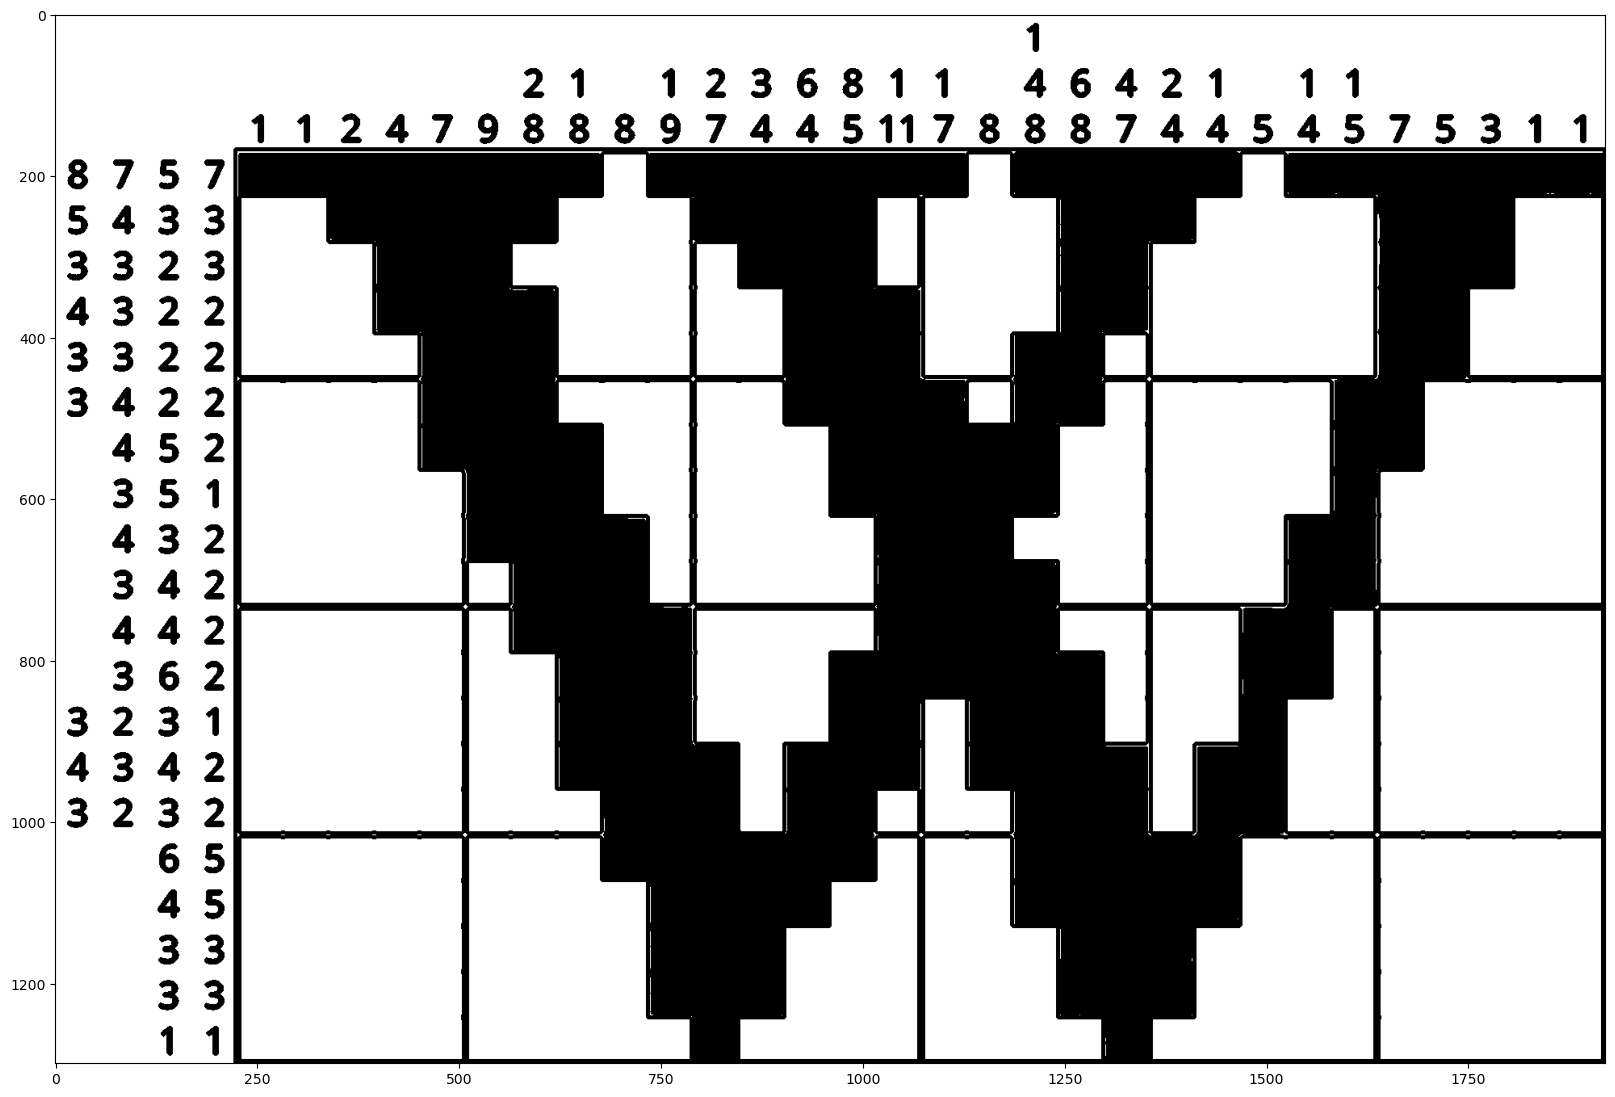

In [282]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
newContours = []
for contour in contours:
    if len(contour) > 0:
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        print(cv2.contourArea(approx))
        print(approx)        
        print(cv2.contourArea(contour))
        print(contour)
        newContours.append(approx)
imageContours = image_contours.copy()
cv2.drawContours(imageContours, contours, -1, (0, 255, 0), 3)        
pyplot.figure(figsize= (20,20))
pyplot.imshow(imageContours, cmap="gray")
pyplot.show()


In [283]:
outline = newContours[0]

[ 197 1260]


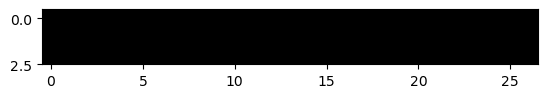

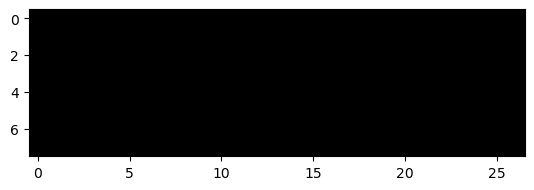

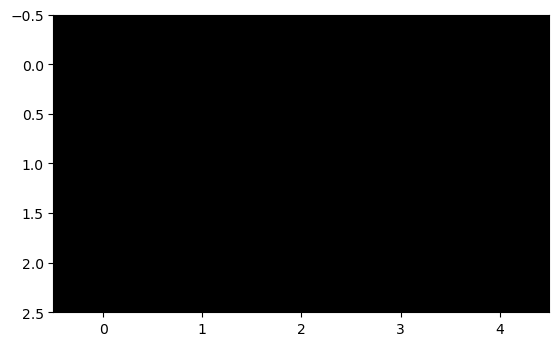

In [284]:
topLeft = (outline.min(axis=0, keepdims=True))[0][0]
bottomRight = outline.max(axis=0, keepdims=True)[0][0]
for pointArray in outline:
    point = pointArray[0]
    if (
            point[0] > topLeft[0] and point[0] < bottomRight[0] and
            point[1] > topLeft[1] and point[1] < bottomRight[1]
        ):
        insidePoint = point
print(insidePoint)
insideImage = image_contours[insidePoint[0]:bottomRight[0], insidePoint[1]:bottomRight[1]]
topSide = image_contours[topLeft[0]:insidePoint[0], insidePoint[1]:bottomRight[1]]
leftSide = image_contours[insidePoint[0]:bottomRight[0], topLeft[1]:insidePoint[1]]

pyplot.imshow(insideImage, cmap="gray")
pyplot.show()
pyplot.imshow(topSide, cmap="gray")
pyplot.show()
pyplot.imshow(leftSide, cmap="gray")
pyplot.show()

# todo check and test :D


# Train model

In [285]:
from keras.models import load_model
# Load the MNIST dataset from OpenCV (this loads pre-trained data)
# This is a convenient way to quickly get started with digit recognition.
def createDigitRecognizer():
    # Load the MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    
    # Preprocess the images
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255

    # Reshape the images and add a channel dimension
    train_images = np.expand_dims(train_images, axis=-1)
    test_images = np.expand_dims(test_images, axis=-1)

    # One-hot encode the labels
    train_labels = tf.keras.utils.to_categorical(train_labels)
    test_labels = tf.keras.utils.to_categorical(test_labels)
    
    # Build the CNN model
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
    return model

import os

import keras.saving
digitRecognizerModelFileName = f"{dataDir}/digitRecognizerMnist.keras"
if (os.path.exists(digitRecognizerModelFileName)):
    digitRecognizer = load_model(digitRecognizerModelFileName)
else:
    digitRecognizer = createDigitRecognizer()
    digitRecognizer.save(f"{dataDir}/digitRecognizerMnist.keras")

# Recognize digits

In [286]:
def extract_digit_image_from_contour(image, contour):
    x, y, w, h = cv2.boundingRect(contour)
    x -= 1
    y -= 1
    w += 2
    h += 2
    bounding_rect = (x, y, w, h)

    if (w > h):
        delta = (w-h)//2
        y -= delta
        h = w
        #digit_image = image[y-delta:y+w-delta, x:x+w]
    else:
        delta = (h-w)//2
        x -= delta
        w = h
        #digit_image = image[y:y+h, x-delta:x+h-delta]
    if (x < 0):
        x = 0
    if (y < 0):
        y = 0
    #if (x + w > image.shape[0]):
    #    x = image.shape[0] - w
    #if (y + h > image.shape[1]):
    #    y = image.shape[1] - h
    
    
    digit_image = image[y:y+h, x:x+w]

    return (digit_image, bounding_rect)

def prepare_digit_image_for_recognition(digit_image):
    digit_image = cv2.resize(digit_image, (28, 28), interpolation=cv2.INTER_AREA)
    digit_image = cv2.GaussianBlur(digit_image, (3,3), 0)
    digit_image = 1-digit_image.reshape(1, 28, 28, 1)
    return digit_image

def recognize_digit_from_image(digit_recognizer, digit_image):
    probabilities = digitRecognizer(digit_image)
    predicted_digit = np.argmax(probabilities)

    #extractor = keras.Model(inputs=digitRecognizer.inputs, outputs=[layer.output for layer in digitRecognizer.layers])
    #intermediate_layer_model = keras.Model(inputs=digitRecognizer.input,
    #                               outputs=digitRecognizer.get_layer("dense_3").output)
    #intermediate_output = intermediate_layer_model(digit_image_resized)
    #print(intermediate_output)

    return (predicted_digit, probabilities)



no digit found: 7 (828, 734, 16, 5) 3.2 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
no digit found: 7 (1163, 1015, 24, 6) 4.0 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
no digit found: 4 (1242, 788, 34, 5) 6.8 [[0.0000000e+00 0.0000000e+00 1.3719821e-05 0.0000000e+00 9.9998629e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


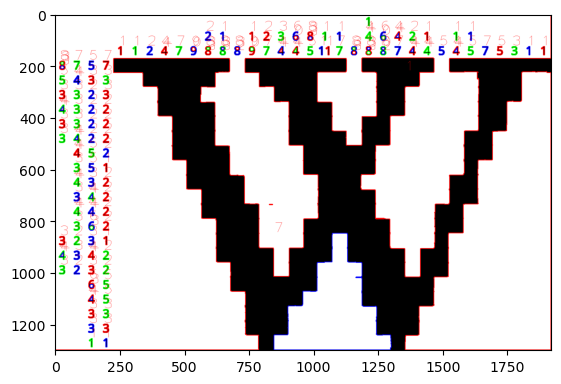

In [287]:
def paint_contours(image, contours):
    colors = [(0,0,255),(0,255,0),(255,0,0)]
    for index, contour in enumerate(contours):
        cv2.drawContours(image, [contour], -1, colors[index % len(colors)], 2)

def recognize_digits(image_contours, image_digits):
    found_contours = []
    image_output = cv2.cvtColor(image_digits, cv2.COLOR_GRAY2BGR)
    
    # Preprocess the image (resize, grayscale, thresholding, etc.)
    contours, _ = cv2.findContours(image_contours.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE )
    paint_contours(image_output, contours)

    for (contour, bounding) in sorted([(contour, cv2.boundingRect(contour))for contour in contours], key=lambda tuple: tuple[1]):
        digit_image, bounding_rect = extract_digit_image_from_contour(image_digits, contour)
        x, y, w, h = bounding_rect

        if (digit_image.size != 0):   # todo add notification we skip because None..
            digit_image = prepare_digit_image_for_recognition(digit_image)
            (predicted_digit, probabilities) = recognize_digit_from_image(digitRecognizer, digit_image)
            predictedProbability = probabilities[0][predicted_digit]

            area = cv2.contourArea(contour)
            aspectRatio = w / h

            if (predictedProbability > .8 and aspectRatio > .15 and aspectRatio < 1.5):# and area < 200):  # magic numbers!
                font = cv2.FONT_HERSHEY_PLAIN
                cv2.putText(image_output, str(predicted_digit), (x, y), font, 4, (255, 0, 0))
                found_contours.append(determineTable.NonogramContour(contour, bounding_rect, predicted_digit, digit_image))
            else:
                print(f"no digit found: {predicted_digit} {bounding_rect} {aspectRatio} {probabilities}")
                found_contours.append(determineTable.NonogramContour(contour, bounding_rect, None, digit_image))

    pyplot.imshow(image_output, cmap="gray")
    return found_contours

found_contours = recognize_digits(image_contours, image_digits)

remove (-1, -1, 1922, 1301) 8
remove (14, 350, 28, 36) 4
remove (14, 914, 28, 37) 4
remove (20, 198, 16, 15) 3
remove (21, 184, 14, 13) 3
remove (71, 237, 28, 36) 4
remove (71, 463, 28, 36) 4
remove (71, 519, 28, 36) 4
remove (71, 632, 28, 36) 4
remove (71, 745, 28, 36) 4
remove (127, 689, 28, 36) 4
remove (127, 745, 28, 36) 4
remove (127, 914, 28, 37) 4
remove (127, 1084, 28, 36) 4
remove (134, 818, 15, 16) 3
remove (134, 1044, 15, 16) 3
remove (415, 130, 13, 18) 4
remove (529, 128, 15, 16) 0
remove (585, 142, 16, 15) 3
remove (586, 128, 14, 12) 3
remove (642, 142, 15, 15) 8
remove (643, 128, 13, 12) 3
remove (698, 142, 16, 15) 2
remove (699, 128, 14, 12) 3
remove (755, 128, 15, 16) 0
remove (828, 734, 16, 5) None
remove (846, 846, 457, 454) 7
remove (861, 124, 28, 36) 4
remove (918, 124, 28, 36) 4
remove (924, 83, 16, 17) 0
remove (980, 85, 16, 15) 3
remove (981, 71, 14, 13) 3
remove (1150, 142, 15, 15) 8
remove (1151, 127, 13, 13) 3
remove (1163, 1015, 24, 6) None
remove (1200, 67, 

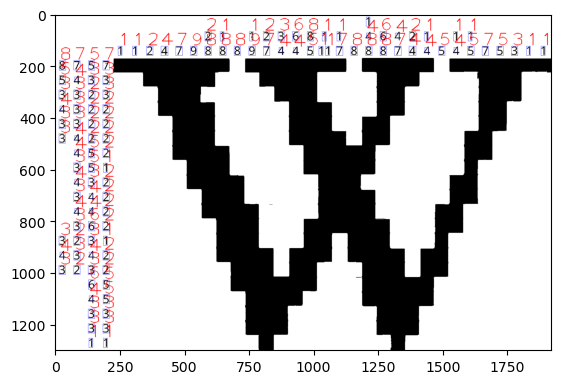

In [288]:
def removeOverlappingDigits(found_contours):
    result = []
    maxArea = 1000  # todo magic number

    for contour in found_contours:
        hasOverlap = False
        for other_contour in found_contours:
            overlapRect = (
                max(contour.bounding_rect[0], other_contour.bounding_rect[0]), 
                max(contour.bounding_rect[1], other_contour.bounding_rect[1]),
                min(contour.bounding_rect[0] + contour.bounding_rect[2], other_contour.bounding_rect[0] + other_contour.bounding_rect[2]), 
                min(contour.bounding_rect[1] + contour.bounding_rect[3], other_contour.bounding_rect[1] + other_contour.bounding_rect[3])
            )
            w = overlapRect[2] - overlapRect[0]
            h = overlapRect[3] - overlapRect[1]
            if (w > 0 and h > 0 and contour.bounding_rect != other_contour.bounding_rect and other_contour.digit != None and (other_contour.bounding_rect[2] * other_contour.bounding_rect[3] < maxArea)):
                overlap = w*h
                area = contour.bounding_rect[2]*contour.bounding_rect[3]
                if (overlap/area > .5):      # magic number!    # todo make sure we don't overlap slightly overlapping contours? (prob not possible)
                    hasOverlap = True
        
        if (not hasOverlap and contour.digit != None and (contour.bounding_rect[2] * contour.bounding_rect[3] < maxArea)):
            result.append(contour)
        else:
            print(f"remove {contour.bounding_rect} {contour.digit}")

    return result

found_contours_no_overlaps = removeOverlappingDigits(found_contours)

imageOutput = image_digits.copy()
imageOutput = cv2.cvtColor(imageOutput, cv2.COLOR_GRAY2BGR)
for contour in found_contours_no_overlaps:
    cv2.putText(imageOutput, str(contour.digit), (contour.bounding_rect[0], contour.bounding_rect[1]),  cv2.FONT_HERSHEY_PLAIN, 5, (255, 0, 0), 2)
    (x, y, w, h) = contour.bounding_rect
    cv2.rectangle(imageOutput, (x, y), (x+w,y+h), (0,0,255))
pyplot.imshow(imageOutput)
print(len(found_contours_no_overlaps))
print([(contour.bounding_rect, contour.digit) for contour in found_contours_no_overlaps])

11


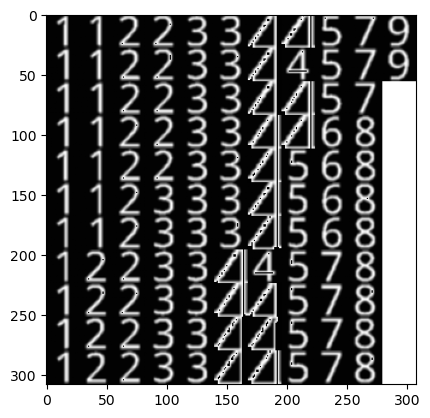

In [289]:
import math
def showImagesUsedForRecognition(found_contours, sort_by_prediction):
    imageSize = math.ceil(len(found_contours) ** .5)
    imageOutput = np.ones((imageSize * 28, imageSize * 28, 1), dtype=np.uint8) * 255

    x = 0
    y = 0

    contours_to_show = found_contours if not sort_by_prediction else sorted(found_contours, key= lambda tuple: tuple.digit)
    for contour in contours_to_show:
        imageOutput[x*28:x*28+28, y*28:y*28+28] = contour.digit_image
        x += 1
        if (x >= imageSize):
            x = 0
            y += 1

    print(imageSize)
    pyplot.imshow(imageOutput, cmap="gray")
showImagesUsedForRecognition(found_contours_no_overlaps, sort_by_prediction=True)

In [290]:
#(A, alpha, B, beta) = grid_parameters = determineTable.findParameters(foundDigits) # todo
(A, alpha, B, beta) = grid_parameters = determineTable.compute_grid_parameters(found_contours_no_overlaps)
(lefties, toppies, sum_left_minus_top) = determineTable.divideOverLeftAndTop(found_contours_no_overlaps, A, alpha, B, beta)

In [291]:
'''
import matplotlib.pyplot


A = 70; alpha = 20
B = 70; beta = 20

def computeCosts(A, alpha):
    costs = 0
    for (center, value) in foundDigits:
        predictionX  = round((center[0] - A) / alpha)
        predictionY = round((center[1] - B) / beta)
        costsX = (predictionX - center[0]) ** 2
        costsY = (predictionY - center[1]) ** 2
        #print(center, costsX, costsY)
        costs += costsX
    return costs

As = np.arange(60, 80, 1)
alphas = np.arange(10, 30, 1)
X, Y = np.meshgrid(As, alphas)
Z = np.vectorize(computeCosts)(X, Y)

fig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z)
'''
'''
As = np.arange(60, 80, 1)
alphas = np.arange(10, 30, 1)
X, Y = np.meshgrid(As, alphas)
Z = np.vectorize(computeCosts)(X, Y)

fig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)
#from matplotlib.ticker import LinearLocator
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#matplotlib.pyplot.show()
'''

'\nAs = np.arange(60, 80, 1)\nalphas = np.arange(10, 30, 1)\nX, Y = np.meshgrid(As, alphas)\nZ = np.vectorize(computeCosts)(X, Y)\n\nfig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})\n# Plot the surface.\nsurf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,\n                       linewidth=0, antialiased=False)\n#from matplotlib.ticker import LinearLocator\n# Customize the z axis.\nax.set_zlim(-1.01, 1.01)\nax.zaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))\n# A StrMethodFormatter is used automatically\nax.zaxis.set_major_formatter(\'{x:.02f}\')\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\n#matplotlib.pyplot.show()\n'

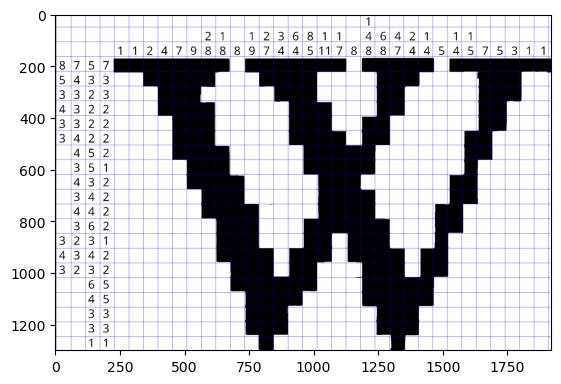

In [292]:
def addAxesFoundToImage(image, parameters):
    (A, alpha, B, beta) = parameters
    imageCopy = image.copy()
    imageCopy = cv2.cvtColor(imageCopy, cv2.COLOR_GRAY2BGR)
    for i in range(-200, 200):
        y = A + alpha * i + alpha//2
        x = B + beta * i + beta//2
        cv2.line(imageCopy, (0, x), (2000, x), (0,0,255))
        cv2.line(imageCopy, (y, 0), (y, 2000), (0,0,255))

    pyplot.imshow(imageCopy)

addAxesFoundToImage(image_digits, grid_parameters)# (141, 56, 142, 57))# (49, 21, 67, 21))
#addAxesFoundToImage(image_digits, (271, 25, 140, 28))# (271, 25, 140, 28) the correct parameters for sample4


OH YEAH!


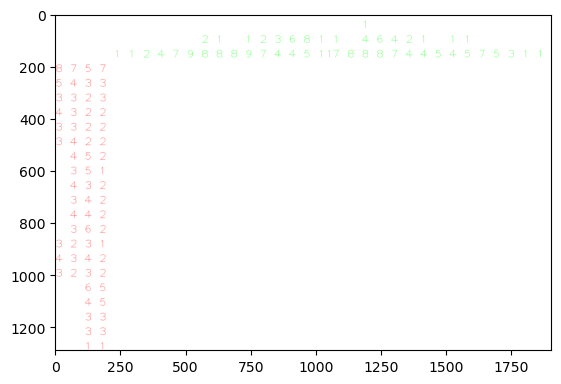

In [293]:
def create_grid_image(lefties, toppies, grid_cell_size):
    grid_columns = [tuple[0][0] for tuple in lefties + toppies]
    grid_rows = [tuple[0][1] for tuple in lefties + toppies]
    grid_bounding_rect = (min(grid_columns), min(grid_rows), max(grid_columns)-min(grid_columns)+1, max(grid_rows)-min(grid_rows)+1)
    grid_image = np.ones((grid_bounding_rect[3] * grid_cell_size, grid_bounding_rect[2] * grid_cell_size, 3), dtype=np.uint8) * 255
    grid_cell_digits = {}

    font = cv2.FONT_HERSHEY_PLAIN
    for ((row, column), digit) in lefties:
        grid_cell_digits.setdefault((row, column), []).append((digit, "left"))
    for ((row, column),  digit) in toppies:
        grid_cell_digits.setdefault((row, column), []).append(( digit, "top"))

    #    cv2.putText(grid_image, str(digit), ((row - grid_bounding_rect[0]) * grid_cell_size, (column + 1 - grid_bounding_rect[1]) * grid_cell_size), font, 2, (255, 0, 0), 3)
    #for (row, column, digit) in toppies:
    #    cv2.putText(grid_image, str(digit), ((row - grid_bounding_rect[0]) * grid_cell_size, (column + 1 - grid_bounding_rect[1]) * grid_cell_size), font, 2, (0, 255, 0), 3)

    for ((row, column), digits) in grid_cell_digits.items():
        for (digit_index, (digit, group)) in enumerate(digits):
            color = (255, 0, 0) if group == "left" else (0, 255, 0)
            text_point = (row - grid_bounding_rect[0]) * grid_cell_size + digit_index * grid_cell_size//3, (column + 1 - grid_bounding_rect[1]) * grid_cell_size
            cv2.putText(grid_image, str(digit), text_point, font, 3, color)

    return grid_image
if (sum_left_minus_top == 0):
    print("OH YEAH!")
else:
    print(f"Nope {sum_left_minus_top}")
pyplot.imshow(create_grid_image(lefties, toppies, alpha))